<a href="https://colab.research.google.com/github/Ayeshanadaf796/Exploring-Consumer-Interaction-and-Brand-Perception-through-Scraped-Reddit-Data/blob/main/Exploring_Consumer_Interaction_and_Brand_Perception_through_Scraped_Reddit_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import praw
import pandas as pd
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

reddit = praw.Reddit(
    client_id='oCgGw7n-G6CyWnmd_e070Q',
    client_secret='8ID3Pqex60aQTJ6fY8eZ6r-R5Qc5MQ',
    user_agent='social_media_scraper by u/MiserableBeach6534'
)


brands = [
    "Nike", "Adidas", "Zara", "H&M", "Gucci",
    "Sephora", "L'Oréal", "MAC Cosmetics", "Nykaa", "Fenty Beauty"
]


def scrape_reddit_brands(subreddit_name, brands, limit=500):
    subreddit = reddit.subreddit(subreddit_name)
    posts_data = []


    feeds = [subreddit.hot(limit=limit), subreddit.new(limit=limit), subreddit.top(limit=limit)]

    for feed in feeds:
        for submission in feed:
            title_lower = submission.title.lower()
            if any(brand.lower() in title_lower for brand in brands):
                url = submission.url if submission.url.startswith("http") else "https://reddit.com" + submission.url
                sentiment = sid.polarity_scores(submission.title)
                posts_data.append({
                    "platform": "Reddit",
                    "subreddit": subreddit_name,
                    "title": submission.title,
                    "url": url,
                    "upvotes": submission.score,
                    "num_comments": submission.num_comments,
                    "created_utc": datetime.fromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                    "sentiment_pos": sentiment['pos'],
                    "sentiment_neu": sentiment['neu'],
                    "sentiment_neg": sentiment['neg'],
                    "sentiment_compound": sentiment['compound']
                })
    return posts_data


subreddits = ["fashion", "makeupaddiction", "beauty", "SkincareAddiction", "Streetwear", "Makeup", "fashionreps"]
all_posts = []

for sub in subreddits:
    print(f"Scraping subreddit: {sub}")
    all_posts.extend(scrape_reddit_brands(sub, brands, limit=500))


df = pd.DataFrame(all_posts)
csv_filename = "social_media_and_brands.csv"
df.to_csv(csv_filename, index=False)
print(f"Saved {len(df)} posts to {csv_filename}")
from google.colab import files
files.download(csv_filename)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/social_media_and_brands.csv')

In [ ]:
data.head()

,platform,subreddit,title,url,upvotes,num_comments,created_utc,sentiment_pos,sentiment_neu,sentiment_neg,sentiment_compound
0,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000
1,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000
2,Reddit,makeupaddiction,Millennials are sick of Sephora and going #bac...,https://www.reddit.com/r/MakeupAddiction/comme...,0,18,2025-09-04 02:51:15,0.000,0.680,0.320,-0.5106
3,Reddit,makeupaddiction,Sephora Colour Flush Lip & Cheek… Similar prod...,https://i.redd.it/fyz6ym8xqcmf1.jpeg,2,1,2025-08-31 12:53:35,0.000,1.000,0.000,0.0000
4,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,21,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179


In [ ]:
data.isnull().sum()

,0
platform,0
subreddit,0
title,0
url,0
upvotes,0
num_comments,0
created_utc,0
sentiment_pos,0
sentiment_neu,0
sentiment_neg,0


In [ ]:
data.duplicated().sum()

np.int64(17)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 139
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   platform            123 non-null    object 
 1   subreddit           123 non-null    object 
 2   title               123 non-null    object 
 3   url                 123 non-null    object 
 4   upvotes             123 non-null    int64  
 5   num_comments        123 non-null    int64  
 6   created_utc         123 non-null    object 
 7   sentiment_pos       123 non-null    float64
 8   sentiment_neu       123 non-null    float64
 9   sentiment_neg       123 non-null    float64
 10  sentiment_compound  123 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.5+ KB


In [ ]:
print(data.describe())

            upvotes  num_comments  sentiment_pos  sentiment_neu  \
count    123.000000    123.000000     123.000000     123.000000   
mean    1849.650407    101.853659       0.049276       0.907276   
std     3345.149277    148.136329       0.099118       0.137890   
min        0.000000      0.000000       0.000000       0.503000   
25%        8.000000      3.000000       0.000000       0.796500   
50%      257.000000     24.000000       0.000000       1.000000   
75%     2016.000000    142.500000       0.000000       1.000000   
max    19809.000000    764.000000       0.351000       1.000000   

       sentiment_neg  sentiment_compound  
count     123.000000          123.000000  
mean        0.043447            0.026753  
std         0.100741            0.282201  
min         0.000000           -0.784500  
25%         0.000000            0.000000  
50%         0.000000            0.000000  
75%         0.000000            0.000000  
max         0.397000            0.803800  


In [ ]:
data.head()

,platform,subreddit,title,url,upvotes,num_comments,created_utc,sentiment_pos,sentiment_neu,sentiment_neg,sentiment_compound
0,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000
2,Reddit,makeupaddiction,Millennials are sick of Sephora and going #bac...,https://www.reddit.com/r/MakeupAddiction/comme...,0,18,2025-09-04 02:51:15,0.000,0.680,0.320,-0.5106
3,Reddit,makeupaddiction,Sephora Colour Flush Lip & Cheek… Similar prod...,https://i.redd.it/fyz6ym8xqcmf1.jpeg,2,1,2025-08-31 12:53:35,0.000,1.000,0.000,0.0000
4,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,21,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179
7,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,23,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179


In [ ]:
def label_sentiment(compound):
  if compound > 0.5:
    return 'Positive'
  elif compound < -0.5:
    return 'Negative'
  else:
    return 'Neutral'


In [ ]:
data['sentiment_label'] = data['sentiment_compound'].apply(label_sentiment)

In [ ]:
data.head()


,platform,subreddit,title,url,upvotes,num_comments,created_utc,sentiment_pos,sentiment_neu,sentiment_neg,sentiment_compound,sentiment_label
0,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000,Neutral
2,Reddit,makeupaddiction,Millennials are sick of Sephora and going #bac...,https://www.reddit.com/r/MakeupAddiction/comme...,0,18,2025-09-04 02:51:15,0.000,0.680,0.320,-0.5106,Negative
3,Reddit,makeupaddiction,Sephora Colour Flush Lip & Cheek… Similar prod...,https://i.redd.it/fyz6ym8xqcmf1.jpeg,2,1,2025-08-31 12:53:35,0.000,1.000,0.000,0.0000,Neutral
4,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,21,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral
7,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,23,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral


In [ ]:
brands = [
    "Nike", "Adidas", "Jordan", "Supreme", "Off-White", "Dior", "Chanel",
    "Gucci", "Balenciaga", "Carhartt", "CPFM", "Denim Tears", "Cactus Jack",
    "Cartier", "LV", "Oakley", "Moose Knuckles", "Ralph Lauren", "Homme Femme",
    "Fenty Beauty", "MAC Cosmetics", "Sephora", "Nykaa", "Rainbow-reps",
    "Stussy", "Arcteryx", "Burberry", "Stone Island", "Ami", "Tommy Hilfiger",
    "YSL", "Goyard", "Porsche", "BMW", "CDG", "Fear of God", "ASSC", "Undercover",
    "Aldo", "Kith"
]

In [ ]:
data['brands_mentioned'] = data['title'].apply(lambda x: [b for b in brands if b.lower() in x.lower()])

In [ ]:
data = data[data['brands_mentioned'].map(len) > 0]

In [ ]:
data.head(5)

,platform,subreddit,title,url,upvotes,num_comments,created_utc,sentiment_pos,sentiment_neu,sentiment_neg,sentiment_compound,sentiment_label,brands_mentioned
0,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000,Neutral,[Nike]
2,Reddit,makeupaddiction,Millennials are sick of Sephora and going #bac...,https://www.reddit.com/r/MakeupAddiction/comme...,0,18,2025-09-04 02:51:15,0.000,0.680,0.320,-0.5106,Negative,[Sephora]
3,Reddit,makeupaddiction,Sephora Colour Flush Lip & Cheek… Similar prod...,https://i.redd.it/fyz6ym8xqcmf1.jpeg,2,1,2025-08-31 12:53:35,0.000,1.000,0.000,0.0000,Neutral,[Sephora]
4,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,21,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral,[Sephora]
7,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,23,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral,[Sephora]


In [ ]:
data.reset_index(drop = True)


,platform,subreddit,title,url,upvotes,num_comments,created_utc,sentiment_pos,sentiment_neu,sentiment_neg,sentiment_compound,sentiment_label,brands_mentioned
0,Reddit,fashion,"Rate my fit…. Overalls, Nike Cortez,",https://i.redd.it/58g5lxko3nkf1.jpeg,6,11,2025-08-22 21:34:39,0.000,1.000,0.000,0.0000,Neutral,[Nike]
1,Reddit,makeupaddiction,Millennials are sick of Sephora and going #bac...,https://www.reddit.com/r/MakeupAddiction/comme...,0,18,2025-09-04 02:51:15,0.000,0.680,0.320,-0.5106,Negative,[Sephora]
2,Reddit,makeupaddiction,Sephora Colour Flush Lip & Cheek… Similar prod...,https://i.redd.it/fyz6ym8xqcmf1.jpeg,2,1,2025-08-31 12:53:35,0.000,1.000,0.000,0.0000,Neutral,[Sephora]
3,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,21,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral,[Sephora]
4,Reddit,makeupaddiction,Can Sephora please stop using so much plastic??,https://www.reddit.com/gallery/1n2qiqf,23,3,2025-08-28 22:37:48,0.245,0.552,0.203,0.1179,Neutral,[Sephora]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Reddit,fashionreps,*UPDATE 2024* ACTUALLY THICK NIKE SOCKS,https://pandabuy.allapp.link/cmtqthprogtum2sv6rq0,1846,218,2024-02-01 14:48:06,0.000,1.000,0.000,0.0000,Neutral,[Nike]
118,Reddit,fashionreps,Have an interview with nike this week...,https://www.reddit.com/r/FashionReps/comments/...,1843,131,2019-10-07 21:07:51,0.000,1.000,0.000,0.0000,Neutral,[Nike]
119,Reddit,fashionreps,8KG UK WINTER HAUL | J4s | Undercover | Nike T...,https://www.reddit.com/gallery/yjl8bd,1762,84,2022-11-01 21:00:41,0.000,1.000,0.000,0.0000,Neutral,"[Nike, LV, Undercover]"
120,Reddit,fashionreps,"32kg Australian Haul Part 1 (Nike, Fear of God...",https://www.reddit.com/gallery/mjskq3,1752,231,2021-04-04 08:53:31,0.129,0.675,0.196,-0.2732,Neutral,"[Nike, Adidas, Jordan, CDG, Fear of God, ASSC,..."


**Descriptive Statistics**

1. Total posts per brand

In [ ]:
posts_per_brand = data['brands_mentioned'].value_counts()
print("Posts per Brand:\n",posts_per_brand)

Posts per Brand:
 brands_mentioned
[Sephora]                                                                                                      31
[Nike]                                                                                                         27
[Adidas]                                                                                                       16
[Gucci]                                                                                                         7
[Nike, Supreme]                                                                                                 4
[MAC Cosmetics]                                                                                                 2
[Nike, Adidas, Supreme, Stussy]                                                                                 2
[Nike, Chanel, Moose Knuckles, Ralph Lauren, Ami]                                                               2
[Nike, Jordan, Supreme, Dior, Balenciaga, CPFM, Denim

2. Sentiment Distribution Per Brand

In [ ]:
data_exploded = data.explode('brands_mentioned')

sentiment_distribution = data_exploded.groupby(['brands_mentioned', 'sentiment_label']).size().unstack(fill_value=0)

print(sentiment_distribution)

sentiment_label   Negative  Neutral  Positive
brands_mentioned                             
ASSC                     0        1         1
Adidas                   0       21         3
Aldo                     0        1         0
Ami                      0       11         1
Arcteryx                 0        3         1
BMW                      0        0         1
Balenciaga               0        9         0
Burberry                 0        6         2
CDG                      0        2         0
CPFM                     0        2         0
Cactus Jack              0        2         0
Carhartt                 0        9         1
Cartier                  0        2         0
Chanel                   0        2         0
Denim Tears              0        2         0
Dior                     0        3         1
Fear of God              0        1         0
Goyard                   0        1         0
Gucci                    0       14         1
Homme Femme              0        

3. Average Engagement Per Brand

In [ ]:
data_exploded = data.explode('brands_mentioned')

avg_engagement = data_exploded.groupby('brands_mentioned')[['upvotes', 'num_comments', 'sentiment_compound']].mean()

print("\nAverage Engagement and Sentiment per Brand:\n", avg_engagement)


Average Engagement and Sentiment per Brand:
                       upvotes  num_comments  sentiment_compound
brands_mentioned                                               
ASSC              2380.500000    225.500000            0.142100
Adidas             942.875000     42.708333            0.102100
Aldo              2384.000000      0.000000            0.000000
Ami                472.666667     48.750000            0.046450
Arcteryx           652.000000    112.500000            0.139350
BMW               3449.000000    564.000000            0.778300
Balenciaga         199.555556     17.111111            0.089311
Burberry           769.500000    130.500000            0.166963
CDG               3044.000000    180.500000           -0.136600
CPFM               304.000000     57.000000            0.401900
Cactus Jack        304.000000     57.000000            0.401900
Carhartt           667.200000     70.700000            0.110590
Cartier            304.000000     57.000000            0.4

4.Most Active Subreddits

In [ ]:
active_subreddits = data['subreddit'].value_counts()
print("\nMost active subreddits:\n", active_subreddits)


Most active subreddits:
 subreddit
fashionreps          73
Makeup               19
Streetwear           15
makeupaddiction       9
beauty                4
fashion               1
SkincareAddiction     1
Name: count, dtype: int64


5.Temporal Metrics

In [ ]:
data_exploded = data.explode('brands_mentioned')
data_exploded['engagement'] = data_exploded['upvotes'] + data_exploded['num_comments']

# Converting timestamp to datetime
data_exploded['created_utc'] = pd.to_datetime(data_exploded['created_utc'], errors='coerce')

# Posts per day per brand
posts_per_day = data_exploded.groupby([data_exploded['created_utc'].dt.date, 'brands_mentioned']).size().unstack(fill_value=0)
print("Posts Per Day per Brand:\n", posts_per_day.head())

# Average engagement per day per brand
engagement_per_day = data_exploded.groupby([data_exploded['created_utc'].dt.date, 'brands_mentioned'])['engagement'].mean().unstack(fill_value=0)
print("\nAverage Engagement Per Day per Brand:\n", engagement_per_day.head())


Posts Per Day per Brand:
 brands_mentioned  ASSC  Adidas  Aldo  Ami  Arcteryx  BMW  Balenciaga  \
created_utc                                                            
2017-01-14           0       0     0    0         0    0           0   
2017-10-29           0       0     0    0         0    0           0   
2017-12-19           0       1     0    0         0    0           0   
2018-10-15           0       0     0    0         0    0           0   
2018-11-24           0       0     0    0         0    0           0   

brands_mentioned  Burberry  CDG  CPFM  ...  Off-White  Porsche  Rainbow-reps  \
created_utc                            ...                                     
2017-01-14               0    0     0  ...          0        0             0   
2017-10-29               0    0     0  ...          0        0             0   
2017-12-19               0    0     0  ...          0        0             0   
2018-10-15               0    0     0  ...          0        0       

6.Average Post Length

In [ ]:
data_exploded['post_length'] = data_exploded['title'].apply(lambda x: len(str(x).split()))

# Average post length per brand
avg_post_length = data_exploded.groupby('brands_mentioned')['post_length'].mean()

print("Average Post Length per Brand:\n", avg_post_length)



Average Post Length per Brand:
 brands_mentioned
ASSC              16.000000
Adidas            10.083333
Aldo               6.000000
Ami               11.250000
Arcteryx          16.000000
BMW               32.000000
Balenciaga        14.666667
Burberry          12.750000
CDG               10.500000
CPFM              26.000000
Cactus Jack       26.000000
Carhartt          17.500000
Cartier           26.000000
Chanel            14.000000
Denim Tears       26.000000
Dior              22.000000
Fear of God       14.000000
Goyard             7.000000
Gucci             11.600000
Homme Femme       26.000000
Jordan            15.857143
Kith              10.500000
LV                16.333333
MAC Cosmetics     15.000000
Moose Knuckles    14.000000
Nike              10.375000
Oakley            30.666667
Off-White         25.000000
Porsche           32.000000
Rainbow-reps       2.000000
Ralph Lauren      22.250000
Sephora           11.354839
Stone Island      20.000000
Stussy            15.250000

Bar Chart: Average Upvotes per Brand

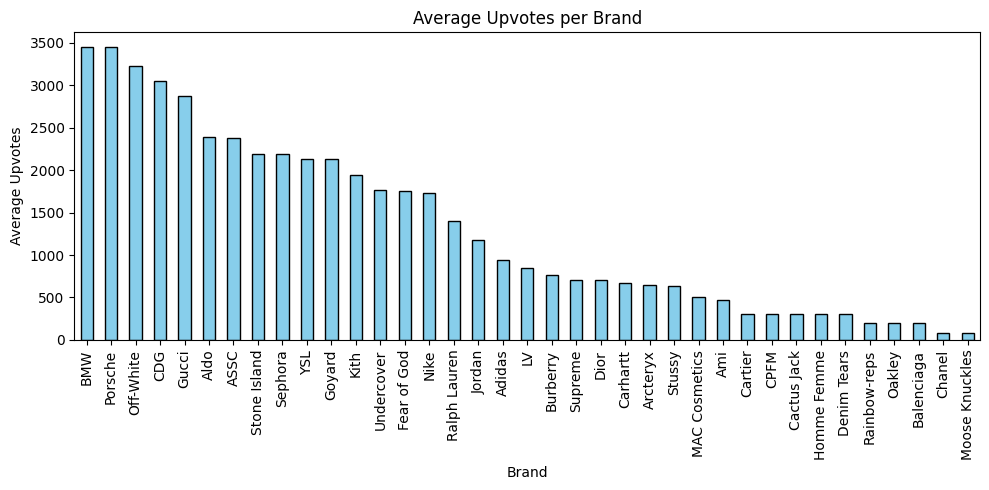

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
avg_upvotes = data_exploded.groupby('brands_mentioned')['upvotes'].mean().sort_values(ascending=False)
plt.figure(figsize=[10,5])
avg_upvotes.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Average Upvotes per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Upvotes')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


Insight: BMW, Porsche, and Off-White lead in average upvotes, showing strong Reddit engagement, while brands like Chanel and Balenciaga attract minimal interaction.

Bar Chart:Average Comments per Brand

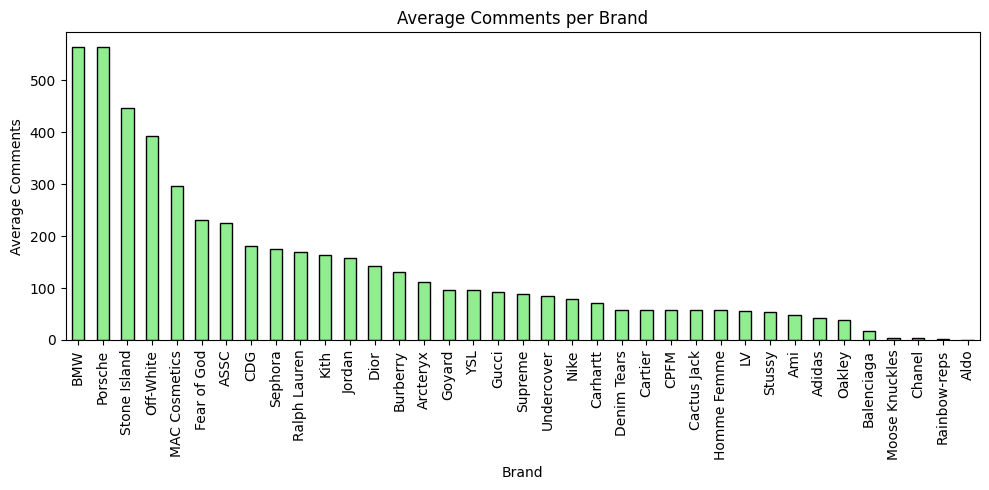

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
avg_comments = data_exploded.groupby('brands_mentioned')['num_comments'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
avg_comments.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Comments per Brand')
plt.ylabel('Average Comments')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Insight: BMW and Porsche lead in average comments, showing high discussion levels, while brands like Chanel, Balenciaga, and Aldo receive very limited engagement.

Histogram : Engagement Distribution per Brand

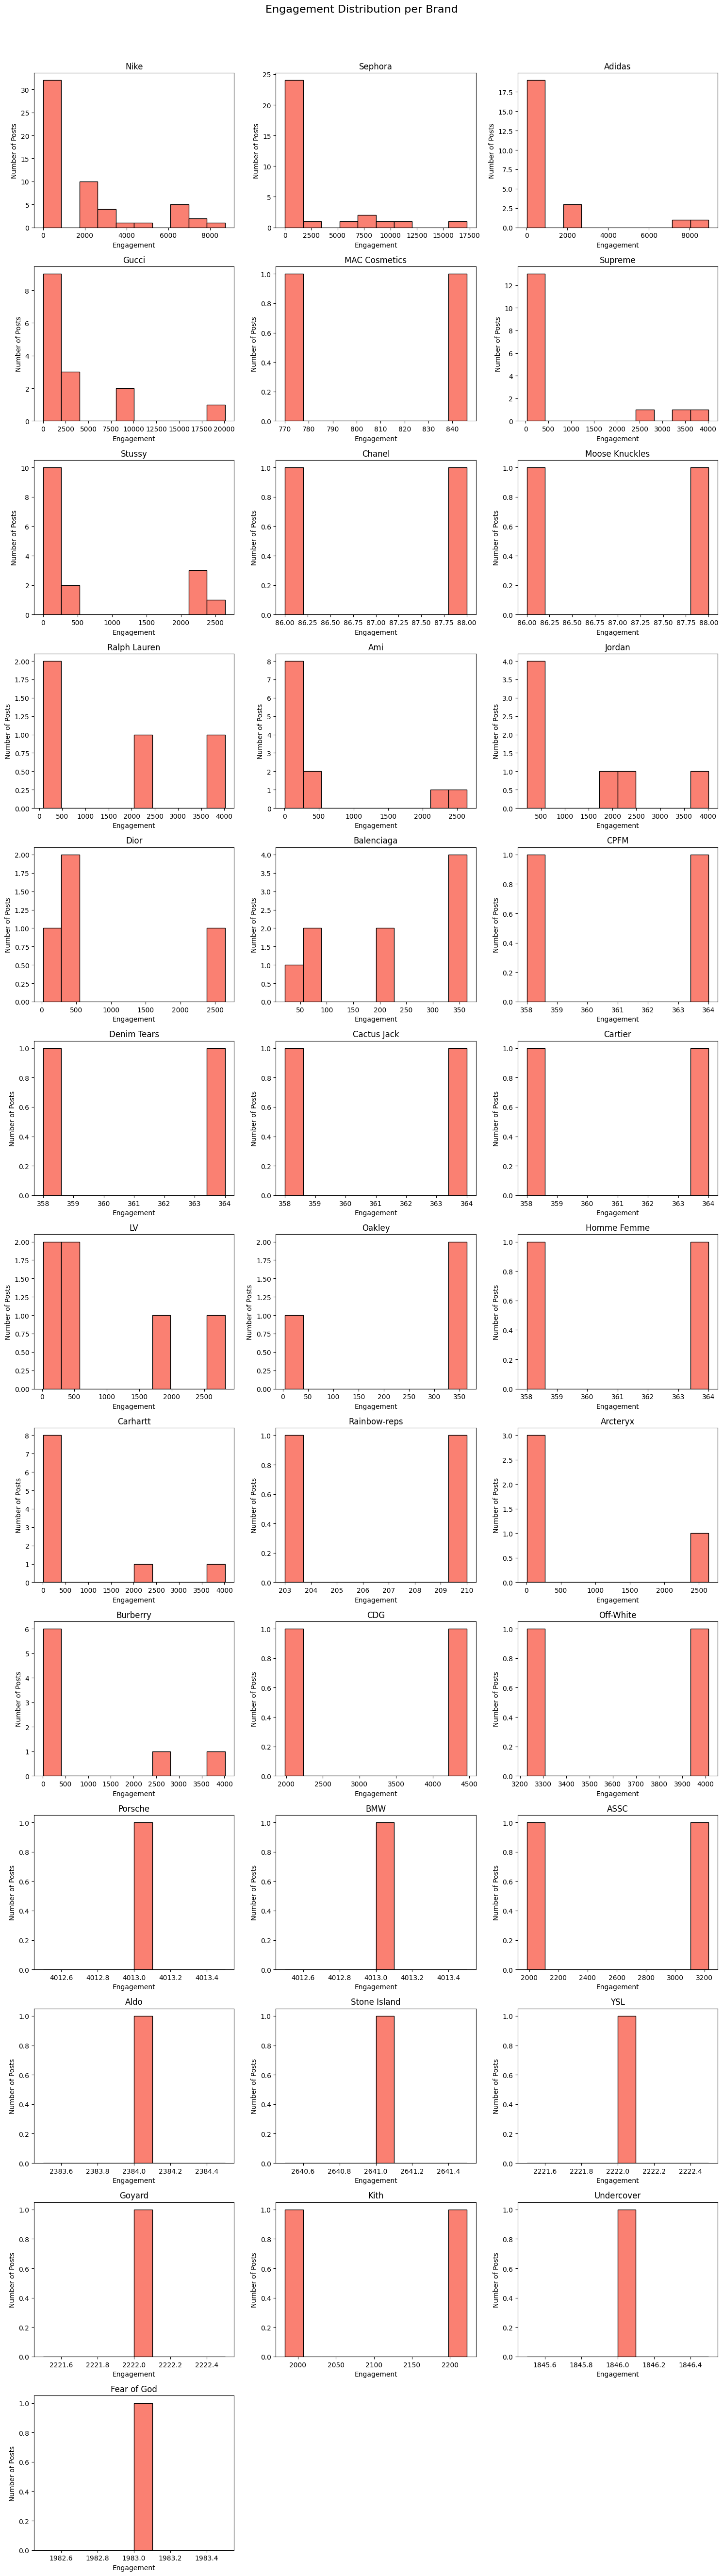

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
brands = data_exploded['brands_mentioned'].unique()
num_brands = len(brands)


cols = 3
rows = (num_brands // cols) + (num_brands % cols > 0)

plt.figure(figsize=(cols*5, rows*4))

for i, brand in enumerate(brands, 1):
    plt.subplot(rows, cols, i)
    brand_data = data_exploded[data_exploded['brands_mentioned'] == brand]['engagement']
    plt.hist(brand_data, bins=10, color='salmon', edgecolor='black')
    plt.title(brand)
    plt.xlabel('Engagement')
    plt.ylabel('Number of Posts')

plt.tight_layout()
plt.suptitle('Engagement Distribution per Brand', fontsize=16, y=1.02)
plt.show()


Insight: Most brands show low-to-moderate engagement with occasional spikes     (Gucci, Sephora, Nike), while many smaller brands have very limited and flat engagement patterns

Stacked Bar Chart:Sentiment Percentage per Brand

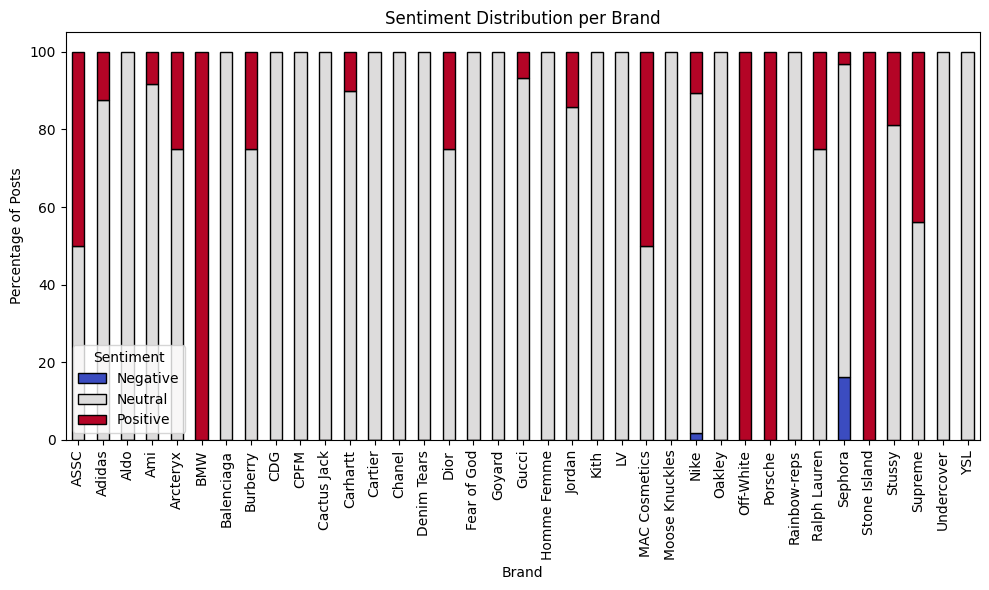

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
sentiment_counts = data_exploded.groupby(['brands_mentioned','sentiment_label']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm', edgecolor='black')
plt.ylabel('Percentage of Posts')
plt.xlabel('Brand')
plt.title('Sentiment Distribution per Brand')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Insight: Most brands have predominantly neutral sentiment, with positive posts scattered across brands like Off-White, Porsche, and Stone Island, while negative sentiment is minimal (seen slightly for Nike, Ralph Lauren, and Sephora).

Heatmap: Sentiment Distribution

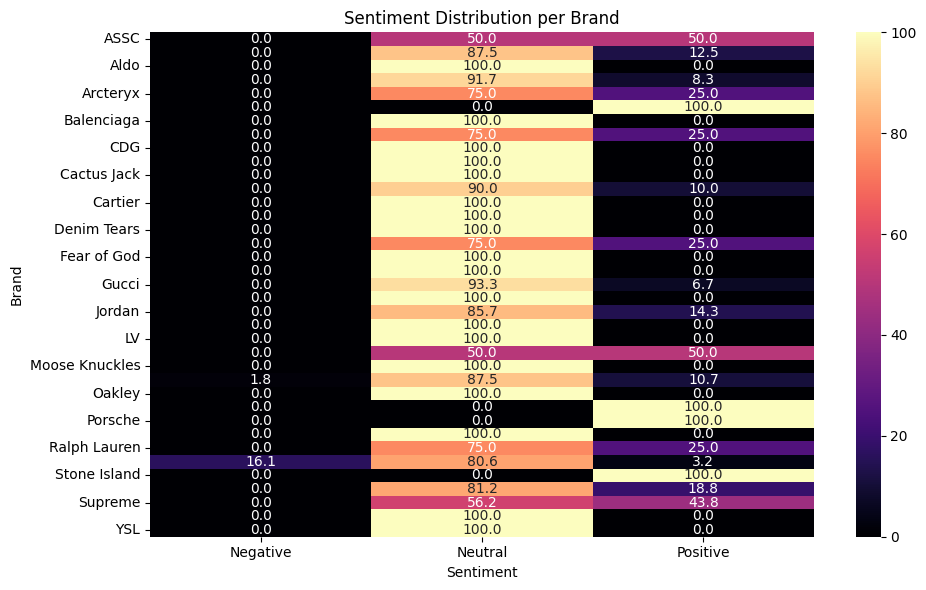

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_percentage, annot=True, fmt=".1f", cmap='magma')
plt.title('Sentiment Distribution per Brand')
plt.ylabel('Brand')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

Insight: Most brands are dominated by neutral sentiment, with positive sentiment visible for Porsche, Balenciaga, and Supreme, while negative sentiment is rare but present for Stone Island, Ralph Lauren, and Oakley.

Bar Chart : Total Posts per Brand

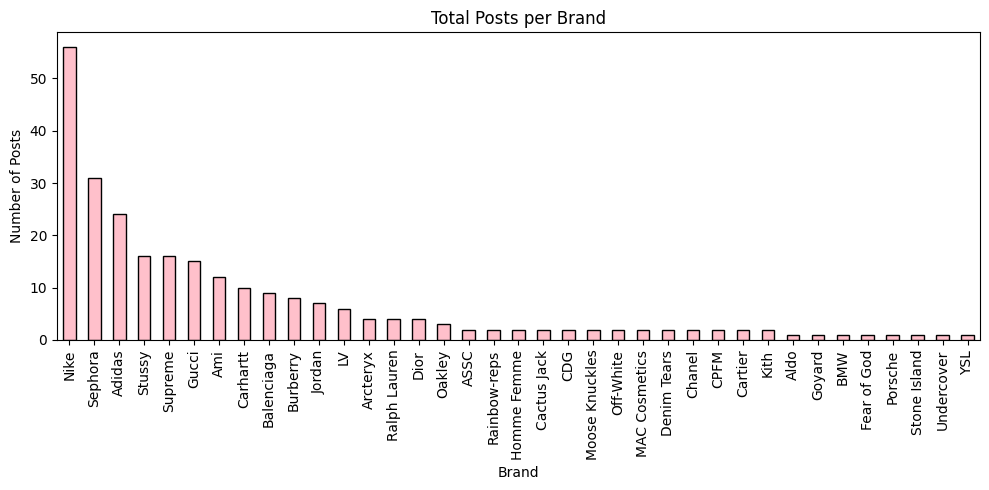

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
total_posts = data_exploded.groupby('brands_mentioned').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
total_posts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Total Posts per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight: Nike, Sephora, and Adidas dominate Reddit discussions with the highest number of mentions, while luxury brands like Gucci, Supreme, and Stussy also have notable visibility. In contrast, many niche or high-end labels (example:YSL, Undercover, Porsche) show very limited engagement.

Bar Chart : Most active subreddits

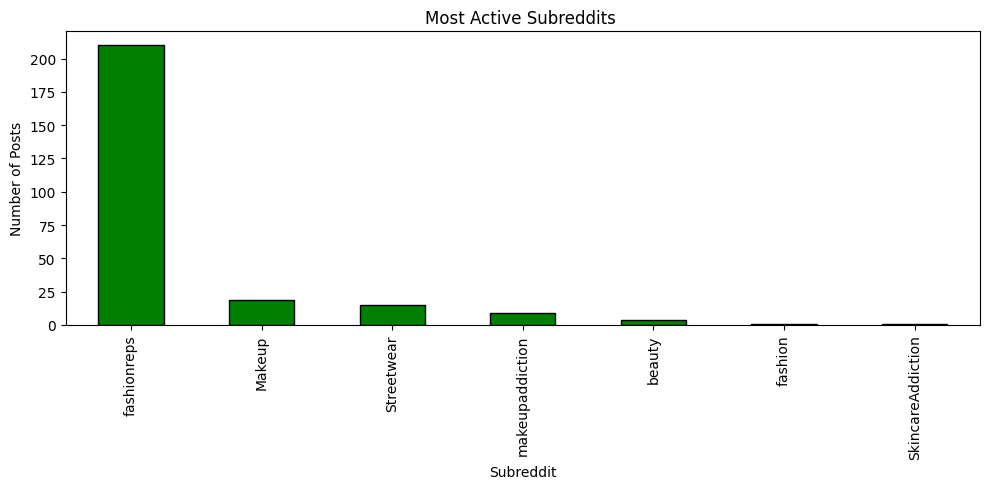

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
subreddit_counts = data_exploded['subreddit'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
subreddit_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Most Active Subreddits ')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Insight: The subreddit r/fashionreps overwhelmingly drives brand discussions, accounting for the majority of posts, while beauty-focused communities like r/Makeup, r/MakeupAddiction, and r/SkincareAddiction contribute smaller but meaningful conversations. Streetwear-focused spaces such as r/Streetwear also show engagement, whereas general communities like r/fashion and r/beauty are less active.

Bar Chart : Most Active Subreddits per Brand

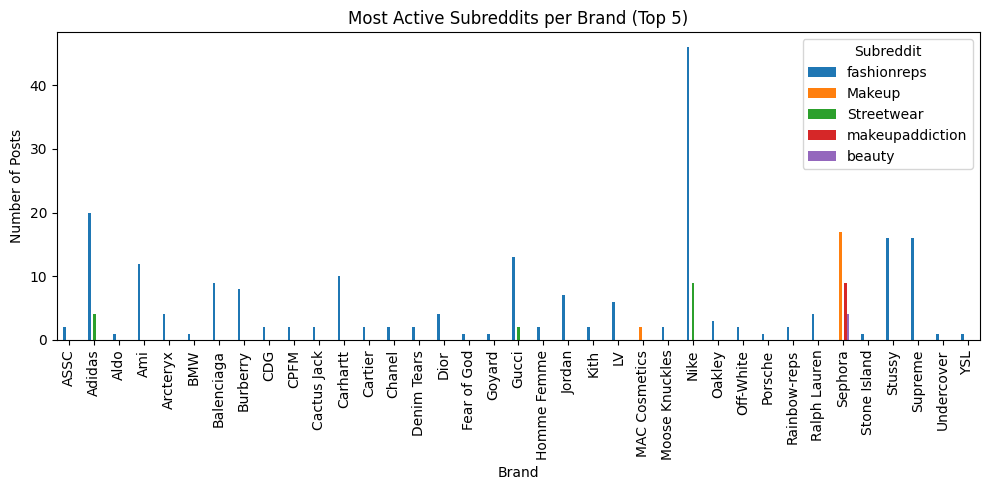

In [ ]:
import pandas as pd
import matplotlib.pyplot as pd
top_n = 5
brand_subreddit_counts = data_exploded.groupby(['brands_mentioned','subreddit']).size().unstack(fill_value=0)
top_subreddits = subreddit_counts.head(top_n).index
brand_subreddit_counts_top = brand_subreddit_counts[top_subreddits]

brand_subreddit_counts_top.plot(kind='bar', figsize=(10,5))
plt.title(f'Most Active Subreddits per Brand (Top {top_n})')
plt.xlabel('Brand')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.legend(title='Subreddit')
plt.tight_layout()
plt.show()

Streetwear brands thrive in r/fashionreps, while beauty brands dominate makeup subreddits; overall sentiment is mostly neutral-to-positive.

**HYPOTHESIS TESTING**

**Hypothesis Test: Nike vs Chanel Engagement**

Null Hypothesis (H₀):
There is no significant difference in engagement (upvotes + comments) between posts mentioning Nike and posts mentioning Chanel.

Alternative Hypothesis (H₁):
There is a significant difference in engagement between posts mentioning Nike and posts mentioning Chanel.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

data_exploded = data.explode('brands_mentioned')

data_exploded['engagement'] = data_exploded['upvotes'] + data_exploded['num_comments']


brand1 = 'Nike'
brand2 = 'Chanel'

engagement_brand1 = data_exploded[data_exploded['brands_mentioned'] == brand1]['engagement']
engagement_brand2 = data_exploded[data_exploded['brands_mentioned'] == brand2]['engagement']

# T - test
t_stat, p_value = ttest_ind(engagement_brand1, engagement_brand2, equal_var=False)

print(f"T-test between {brand1} and {brand2} engagement:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in engagement between brands.")
else:
    print("Result: No significant difference in engagement between brands.")

T-test between Nike and Chanel engagement:
T-statistic: 5.24, P-value: 0.0000
Result: Significant difference in engagement between brands.


**Test Used**: Independent two-sample t-test

**Results**:

T-statistic = 5.24

P-value = 0.0000 (p < 0.05)

**Conclusion**:Since the p-value is less than 0.05, we reject the null hypothesis.

There is a statistically significant difference in engagement between Nike and Chanel posts on Reddit.

**TIME SERIES ANALYSIS**

Tracking daily average engagement per brand over time.

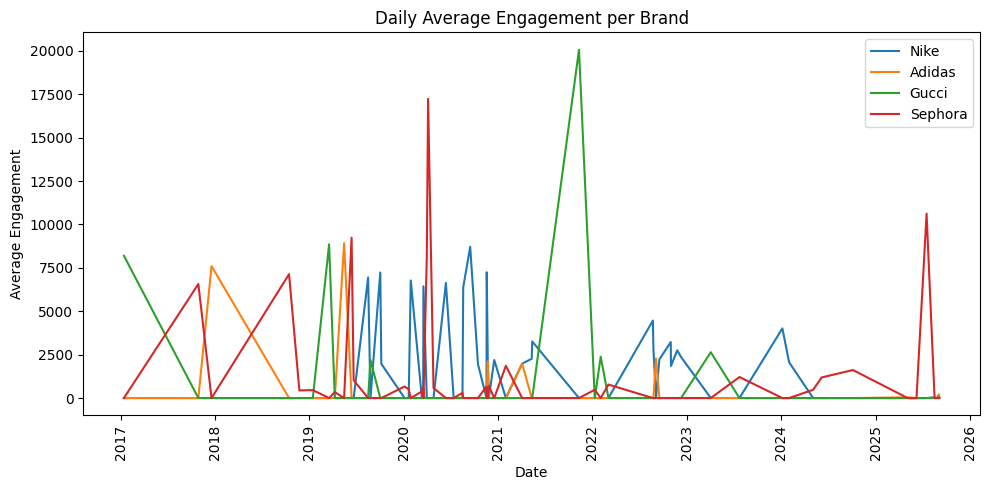

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Converting timestamp to datetime
data_exploded['created_utc'] = pd.to_datetime(data_exploded['created_utc'], errors='coerce')

data_exploded['engagement'] = data_exploded['upvotes'] + data_exploded['num_comments']
engagement_per_day = data_exploded.groupby([data_exploded['created_utc'].dt.date, 'brands_mentioned'])['engagement'].mean().unstack(fill_value=0)

# Plotting time series for selected brands
selected_brands = ['Nike', 'Adidas', 'Gucci','Sephora']

plt.figure(figsize=(10,5))
for brand in selected_brands:
    if brand in engagement_per_day.columns:
        plt.plot(engagement_per_day.index, engagement_per_day[brand], label=brand)

plt.title('Daily Average Engagement per Brand')
plt.xlabel('Date')
plt.ylabel('Average Engagement')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion**:Nike dominates with consistent engagement, showing it has an active community presence. Gucci and Sephora experience viral but short-lived surges, indicating event-based influence. Adidas lags behind, showing limited Reddit traction. Overall, Reddit engagement is highly event-driven rather than steady, highlighting the importance of viral moments in brand influence.